# Import library

In [87]:
import pandas as pd
import stylecloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Read data

In [2]:
df = pd.read_csv('/Users/zihaowang/Dropbox/UCI/3. Winter2021/BANA277 Customer and Social Analytics/Final Project/final_comment_data.csv')

In [3]:
df

,Comment,Author,Timestamp,LinkedPostID,LinkedPostID_final
0,Bro wtf... 2021 is crazy.,Crimson_Kang,2021-01-30,t3_l8rf4k,l8rf4k
1,This is the hype we need for next week!\n\nWE ...,Brankela3,2021-01-30,t3_l8rf4k,l8rf4k
2,This is easily one of the greatest things to h...,shorgarr,2021-01-30,t3_l8rf4k,l8rf4k
3,Just when you think this sub can't be any dumb...,MuchArtichoke3,2021-01-30,t3_l8rf4k,l8rf4k
4,[removed],NaN,2021-01-30,t3_l8rf4k,l8rf4k
...,...,...,...,...,...
118068,"REMEMBER: Once you buy shares, you can hold th...",Physcodbzfan85,2021-01-20,t3_l1ca4x,l1ca4x
118069,“We understand short interest better than you”...,CFlizzed,2021-01-20,t3_l1ca4x,l1ca4x
118070,Wait this is a real post from an institution t...,baconeggspotato,2021-01-20,t3_l1ca4x,l1ca4x
118071,"Doing my part boys, 500 shares throughout the ...",aveelance,2021-01-20,t3_l1ca4x,l1ca4x


In [4]:
#delete 'LinkedPostID'
del df['LinkedPostID']

# Drop missing value

- Some posts have been removed/deleted by erither the platform or the author themselves (marked as [removed] or [deleted])
- Since the 'Author' will be 'NaN' when the 'comment' is [removed] or [deleted], we only have to remove those rows that meet the condition that 'Author' has Nan

In [5]:
df_dropna = df.dropna()

In [6]:
df_dropna

,Comment,Author,Timestamp,LinkedPostID_final
0,Bro wtf... 2021 is crazy.,Crimson_Kang,2021-01-30,l8rf4k
1,This is the hype we need for next week!\n\nWE ...,Brankela3,2021-01-30,l8rf4k
2,This is easily one of the greatest things to h...,shorgarr,2021-01-30,l8rf4k
3,Just when you think this sub can't be any dumb...,MuchArtichoke3,2021-01-30,l8rf4k
6,This is what happens when you put money into t...,dontescapereality,2021-01-30,l8rf4k
...,...,...,...,...
118068,"REMEMBER: Once you buy shares, you can hold th...",Physcodbzfan85,2021-01-20,l1ca4x
118069,“We understand short interest better than you”...,CFlizzed,2021-01-20,l1ca4x
118070,Wait this is a real post from an institution t...,baconeggspotato,2021-01-20,l1ca4x
118071,"Doing my part boys, 500 shares throughout the ...",aveelance,2021-01-20,l1ca4x


# EDA

## Count distinct 'Author'

In [7]:
cnt_author = df_dropna['Author'].nunique()

In [8]:
cnt_author

77173

## Count distinct 'Post ID'

In [9]:
cnt_postid = df_dropna['LinkedPostID_final'].nunique()

In [10]:
cnt_postid

778

## Count 'Comment' number by 'Author'

- #NAME? means those Author use special sign as their user name, which Praw package cannot get
- In this situation, we simply igonre those Authors who use special sign as their user name, and look diectly from the second highest

In [11]:
df_dropna.groupby(['Author'])['Comment'].count().nlargest(10)

Author
#NAME?                 102
OurLordOfWar            61
AutoModerator           56
Haggerstonian           42
jakethedumbmistake      42
HyperLightDream         40
RoscoMan1               40
Smurphilicious          39
QuarantineSucksALot     38
dautrocMontreal         34
Name: Comment, dtype: int64

## 'Comments' counts by time

In [102]:
df_dropna.groupby(['Timestamp'])['Comment'].count().nlargest(50)

Timestamp
2021-01-29    12676
2021-01-28    12456
2021-02-01     7518
2021-02-02     7436
2021-01-30     6982
2021-01-27     6262
2021-01-31     6095
2021-02-25     4623
2021-02-03     3722
2021-02-24     3690
2021-02-18     3118
2021-02-04     2315
2021-02-27     1879
2021-03-04     1740
2021-01-26     1718
2021-03-02     1675
2021-02-26     1509
2021-02-22     1478
2021-03-03     1241
2021-02-23     1189
2021-02-05     1135
2021-02-07     1098
2021-03-01     1068
2021-03-05     1061
2021-02-28     1007
2021-02-06     1005
2021-02-19     1004
2021-02-20      927
2021-02-16      895
2021-02-09      864
2021-01-25      791
2021-02-12      750
2021-02-08      700
2021-02-17      653
2021-03-07      628
2021-02-10      619
2021-02-11      586
2021-02-21      562
2021-02-15      521
2021-02-14      458
2021-01-14      374
2021-01-06      368
2021-01-21      368
2021-01-22      358
2021-03-06      342
2021-01-19      333
2020-12-16      308
2020-12-10      289
2021-01-13      285
2020-11-09

## Word cloud by event stage

### Before event

In [13]:
#get before event data from the original data
before_event = df_dropna[(df_dropna['Timestamp'] < '2021-01-13')]

In [14]:
before_event.tail()

,Comment,Author,Timestamp,LinkedPostID_final
117322,[me when asked](https://media1.giphy.com/media...,whichoneofyouispink,2020-12-06,k7fnni
117323,Lmao,baiden00,2020-12-06,k7fnni
117324,This is sometimes how I feel. I've made like 5...,KeterLevelPancakes,2020-12-11,k7fnni
117326,"Retarded? This man is a genius, everything he'...",eplugplay,2020-12-05,k7fnni
117327,r/me_irl,cleversailinghandle,2020-12-05,k7fnni


In [15]:
before_event_list = before_event["Comment"].values.tolist() 

In [16]:
before_event_text = ''.join(before_event_list)

In [17]:
bookreader = stylecloud.gen_stylecloud(
                          text = before_event_text,
                          size = 1028,                         
                          icon_name = "fab fa-reddit",
                          palette='colorbrewer.diverging.PuOr_8',
                          background_color ='white')

before_event.png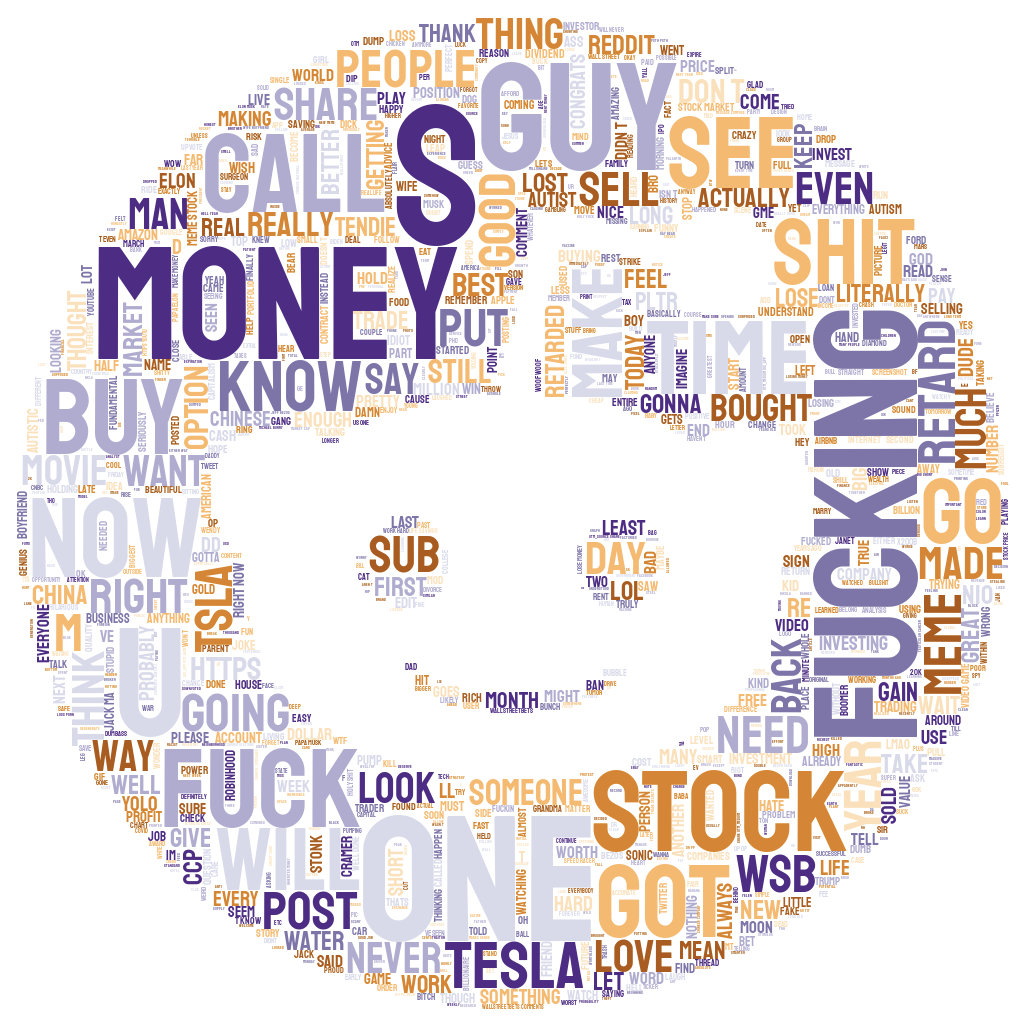

### First wave

In [28]:
#get first wave data from the original data (01/13/2021 - 01/27/2021)
first_wave = df_dropna[(df_dropna['Timestamp'] >= '2021-01-13') & (df_dropna['Timestamp'] < '2021-01-27')]

In [29]:
first_wave

,Comment,Author,Timestamp,LinkedPostID_final
5143,"Hey r/all,\n\nWelcome to r/wallstreetbets! (WS...",OPINION_IS_UNPOPULAR,2021-01-26,l5nphz
5144,HE DIDN’T SELL. I’M NOT FUCKING SELLING! \n...,PleaseAssumeMyGender,2021-01-26,l5nphz
5145,THE GOAT OF WSB,Chicken_fondue,2021-01-26,l5nphz
5146,This fucking madlad gained 9 MILLION today and...,UBCStudent9929,2021-01-26,l5nphz
5147,#I’M NOT FUCKING LEAVING,EliManning200IQ,2021-01-26,l5nphz
...,...,...,...,...
118068,"REMEMBER: Once you buy shares, you can hold th...",Physcodbzfan85,2021-01-20,l1ca4x
118069,“We understand short interest better than you”...,CFlizzed,2021-01-20,l1ca4x
118070,Wait this is a real post from an institution t...,baconeggspotato,2021-01-20,l1ca4x
118071,"Doing my part boys, 500 shares throughout the ...",aveelance,2021-01-20,l1ca4x


In [30]:
first_wave_list = first_wave["Comment"].values.tolist() 

In [31]:
before_event_text = ''.join(first_wave_list)

In [33]:
bookreader = stylecloud.gen_stylecloud(
                          text = before_event_text,
                          size = 1028,                         
                          icon_name = "fas fa-rocket",
                          palette='colorbrewer.diverging.RdGy_8',
                          background_color ='white')

first_wave.png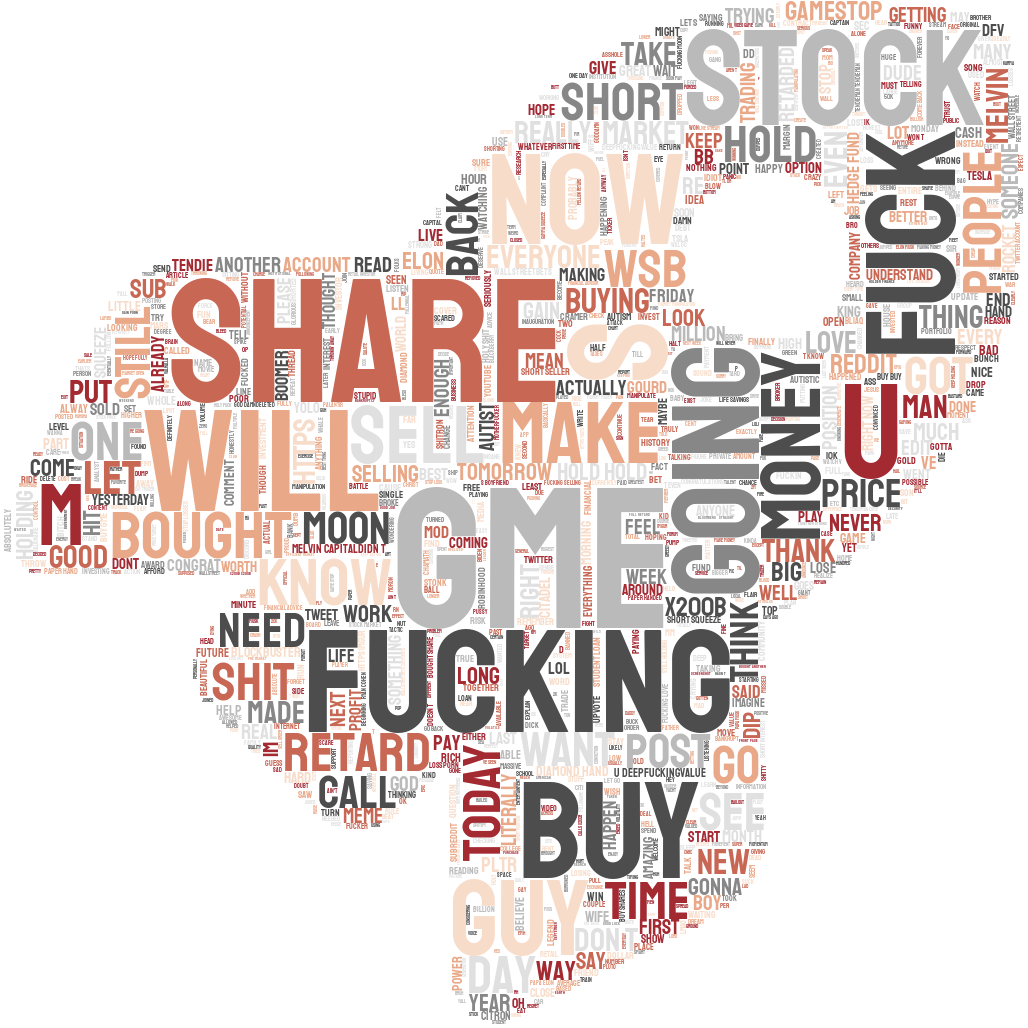

### Decrese

In [26]:
#get decrease data from the original data 
decrease = df_dropna[(df_dropna['Timestamp'] >= '2021-01-27') & (df_dropna['Timestamp'] < '2021-01-28')]

In [27]:
decrease

,Comment,Author,Timestamp,LinkedPostID_final
727,Congratulations /u/DeepFuckingValue 🚀\n\nIt's ...,only1parkjisung,2021-01-27,l6ekdz
729,HE’S STILL IN !!! 👀 💎🙌 🚀🚀🚀,quackquack105,2021-01-27,l6ekdz
730,# FIFTY. MILLION. DOLLARS.\n\n1000x return! **...,TurkeyPits,2021-01-27,l6ekdz
731,Your steady hand convinced many of us to not o...,reality_czech,2021-01-27,l6ekdz
732,Cant wait to watch the ESPN 30 for 30 they mak...,rifer53,2021-01-27,l6ekdz
...,...,...,...,...
115824,the market is down -468 points\n\nGME is up 11...,cj1angle,2021-01-27,l65p3u
115825,#In until this shit hits 8008.135,LongEZE,2021-01-27,l65p3u
115826,MY ROBINHOOD WOULDNT LET ME BUY FOR A COUPLE M...,Hargreaves7,2021-01-27,l65p3u
115827,#all brokerages being down is bullish 🚀🚀,XXXHELLBOY,2021-01-27,l65p3u


In [34]:
decrease_list = decrease["Comment"].values.tolist() 

In [35]:
decrease_text = ''.join(decrease_list)

In [39]:
bookreader = stylecloud.gen_stylecloud(
                          text = decrease_text,
                          size = 1028,                         
                          icon_name = "fab fa-sticker-mule",
                          palette='colorbrewer.diverging.PuOr_6',
                          background_color ='white')

decrease.png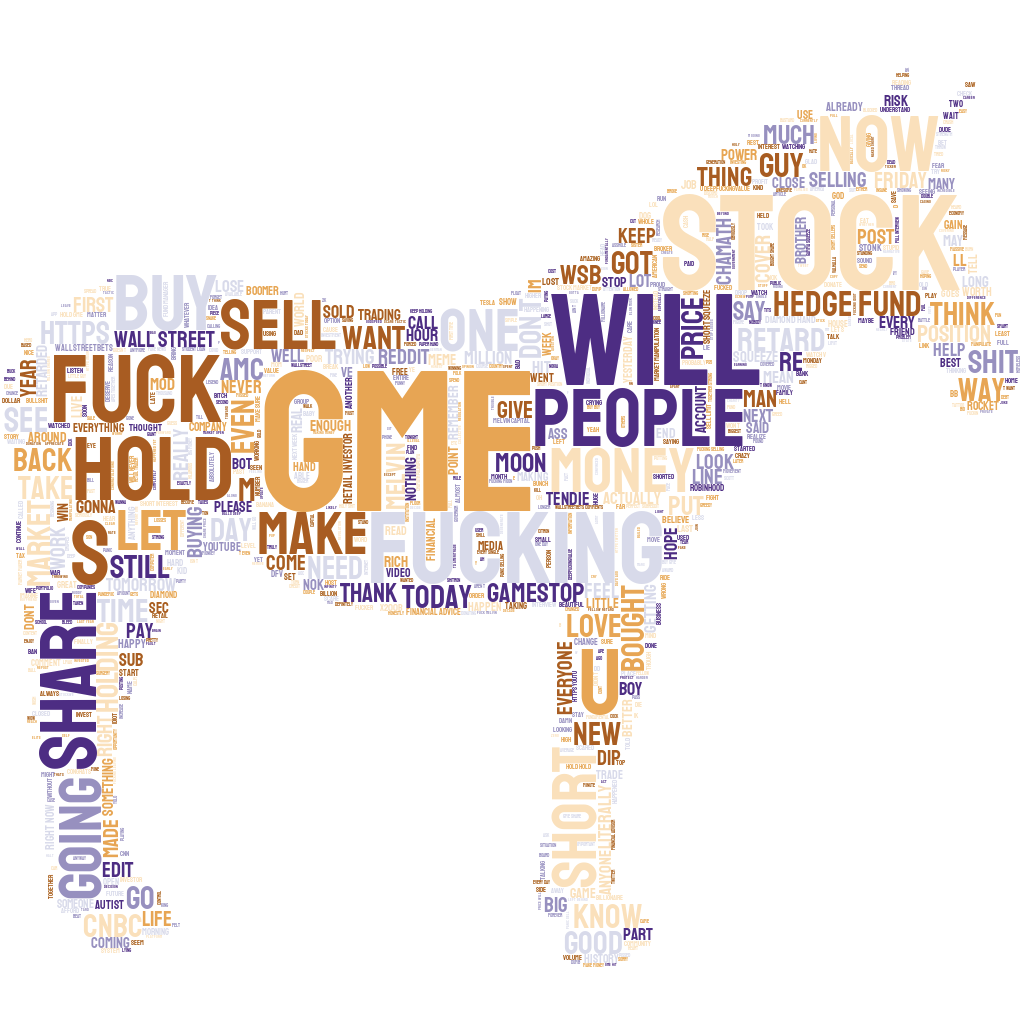

### Second wave

In [41]:
#get decrease data from the original data 
second_wave = df_dropna[(df_dropna['Timestamp'] >= '2021-01-28') & (df_dropna['Timestamp'] < '2021-01-29')]

In [42]:
second_wave

,Comment,Author,Timestamp,LinkedPostID_final
67,This just makes me more eager to fuck them ove...,LemonPoopyDumpling,2021-01-28,l6wu59
68,I smell a class action,jab116,2021-01-28,l6wu59
69,I haven't even been able to use the search fun...,DerpingtonHerpsworth,2021-01-28,l6wu59
70,Hop on Fidelity!,Milkpowder44,2021-01-28,l6wu59
71,Exactly!!! Their best option would be to just ...,Cherry_and_the_white,2021-01-28,l6wu59
...,...,...,...,...
111847,Some days when all I see is red dildos 📈 I jus...,3JaneTessier-Ashpool,2021-01-28,l77h3i
111848,I have done nothing but lose fucking money sin...,sicklyfofifty,2021-01-28,l77h3i
115389,"If i win, im buying George Soros a big mac",Nilmag,2021-01-28,l685hg
115390,That’s the difference. When people like us (th...,dontbdkch29,2021-01-28,l685hg


In [54]:
second_wave_list = second_wave["Comment"].values.tolist() 

In [44]:
second_wave_text = ''.join(second_wave_list)

In [49]:
bookreader = stylecloud.gen_stylecloud(
                          text = second_wave_text,
                          size = 1028,                         
                          icon_name = "fas fa-hand-holding-usd",
                          palette='colorbrewer.diverging.RdBu_4',
                          background_color ='white')

second_wave.png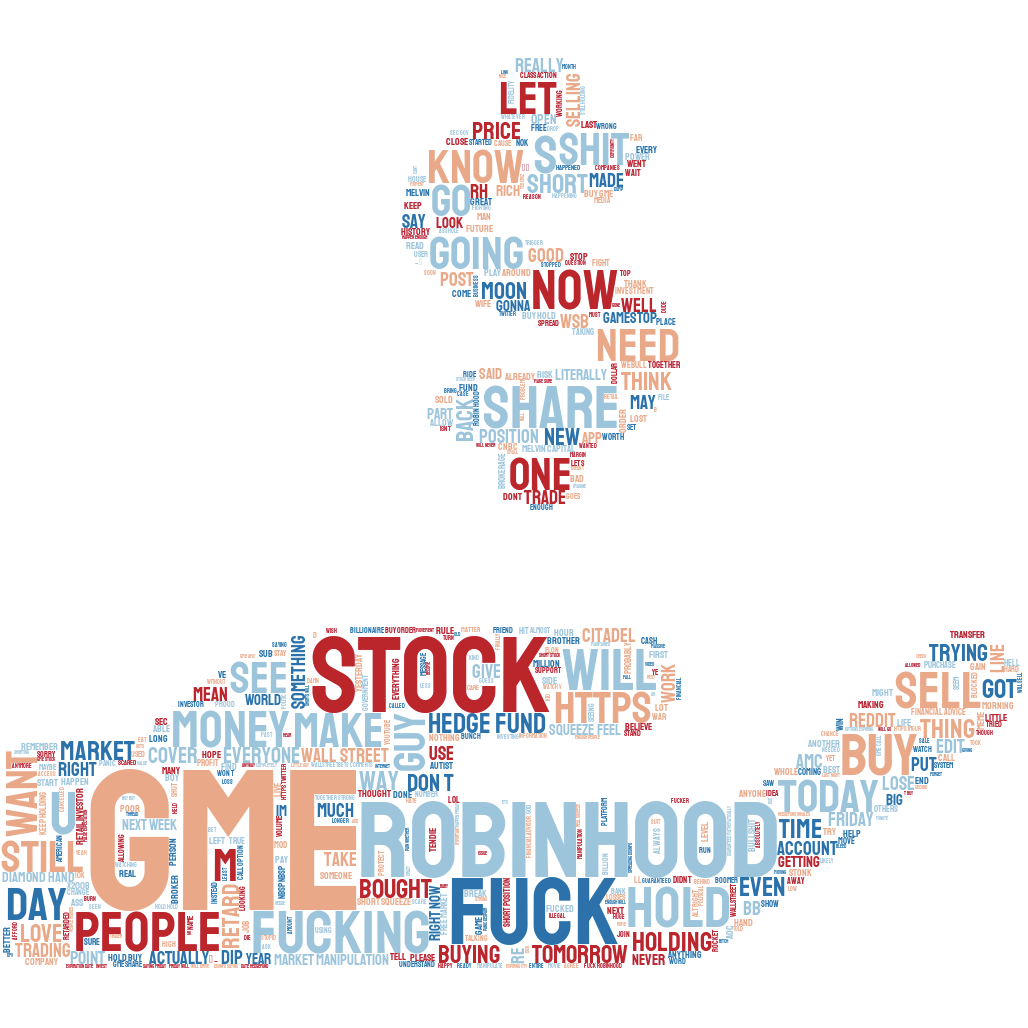

### Post event

In [50]:
#get decrease data from the original data 
post_event = df_dropna[(df_dropna['Timestamp'] >= '2021-01-29') ]

In [51]:
post_event

,Comment,Author,Timestamp,LinkedPostID_final
0,Bro wtf... 2021 is crazy.,Crimson_Kang,2021-01-30,l8rf4k
1,This is the hype we need for next week!\n\nWE ...,Brankela3,2021-01-30,l8rf4k
2,This is easily one of the greatest things to h...,shorgarr,2021-01-30,l8rf4k
3,Just when you think this sub can't be any dumb...,MuchArtichoke3,2021-01-30,l8rf4k
6,This is what happens when you put money into t...,dontescapereality,2021-01-30,l8rf4k
...,...,...,...,...
117867,Haha rekt,blumpkinblake,2021-02-20,lohbb7
117868,*The family accountant*,Slyx37,2021-02-20,lohbb7
117869,Now I don’t feel so bad..,Saint_of_Fury,2021-02-20,lohbb7
117870,Dude is ballin' on cloud air Force onesies,hellpyer,2021-02-20,lohbb7


In [53]:
post_event_list = post_event["Comment"].values.tolist() 

In [55]:
post_event_text = ''.join(post_event_list)

In [59]:
bookreader = stylecloud.gen_stylecloud(
                          text = post_event_text,
                          size = 1028,                         
                          icon_name = "fas fa-ambulance",
                          palette='colorbrewer.diverging.BrBG_4',
                          background_color ='white')

post_event.png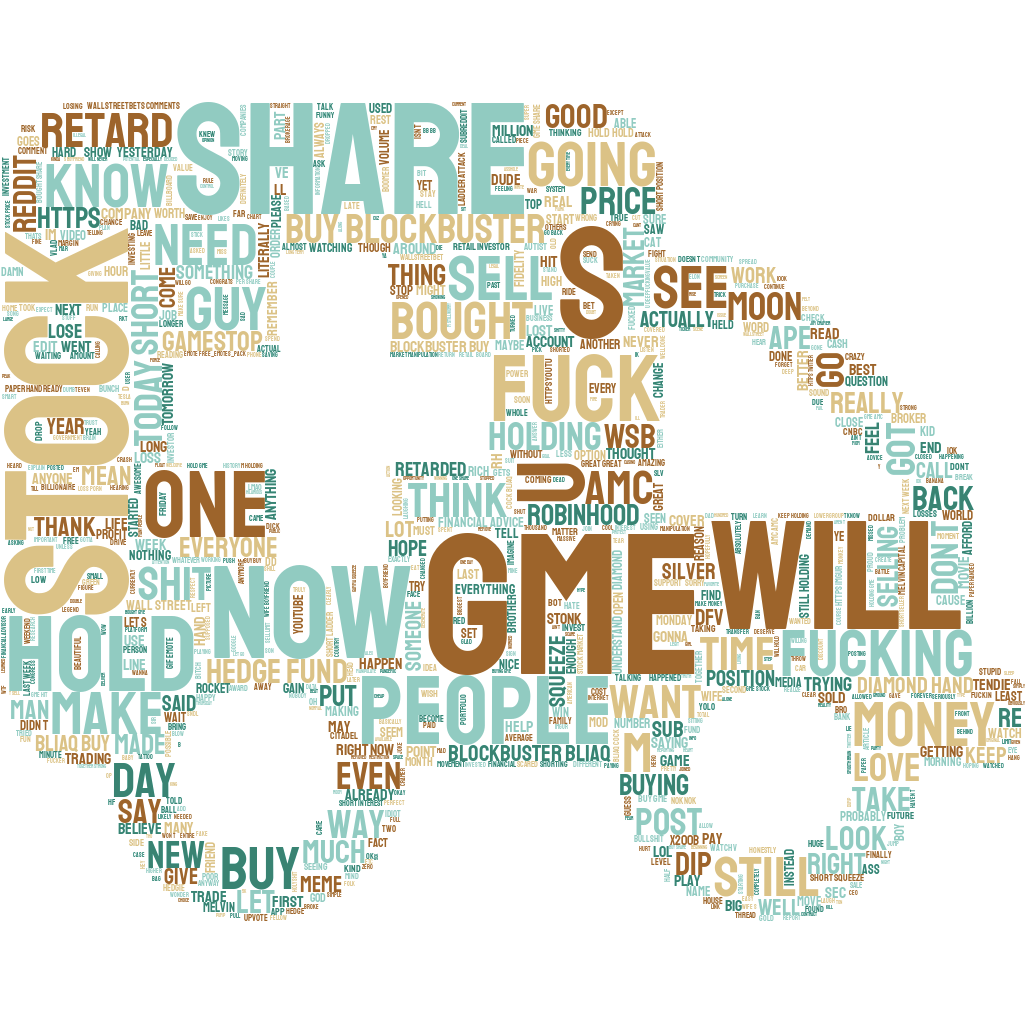

# Sentiment Analysis

## Before event

In [73]:
before_event['Scores']=before_event['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
before_event['Compound']= before_event['Scores'].apply(lambda d:d['compound'])
before_event['Label'] = before_event['Compound'].apply(lambda c: 'POS' if c > 0 else ('NEG' if c < 0 else 'NEU'))

In [75]:
before_event

,Comment,Author,Timestamp,LinkedPostID_final,Scores,Compound,Label
26728,If Amazon boxes had gullwing doors on them.......,messyslate,2021-01-07,ksldfd,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",0.7351,POS
26729,If you go negative enough on a computer it'll ...,Constant_Curve,2021-01-07,ksldfd,"{'neg': 0.242, 'neu': 0.523, 'pos': 0.235, 'co...",-0.0258,NEG
26730,You don’t go to a casino and expect things to ...,_night_fall_,2021-01-07,ksldfd,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
26731,Solid DD,rbasati,2021-01-07,ksldfd,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.1531,POS
26732,Bezos should just do a split on his stocks and...,jeepz127,2021-01-07,ksldfd,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.5848,POS
...,...,...,...,...,...,...,...
117322,[me when asked](https://media1.giphy.com/media...,whichoneofyouispink,2020-12-06,k7fnni,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
117323,Lmao,baiden00,2020-12-06,k7fnni,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5994,POS
117324,This is sometimes how I feel. I've made like 5...,KeterLevelPancakes,2020-12-11,k7fnni,"{'neg': 0.174, 'neu': 0.547, 'pos': 0.278, 'co...",0.3855,POS
117326,"Retarded? This man is a genius, everything he'...",eplugplay,2020-12-05,k7fnni,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",-0.6114,NEG


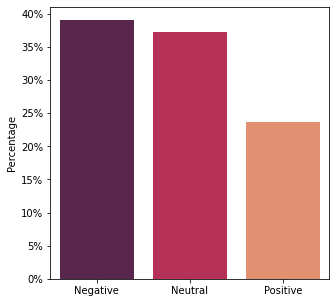

In [89]:
fig, ax = plt.subplots(figsize=(5, 5))

counts = before_event.Label.value_counts(normalize=True)

sns.barplot(x=counts.index, y=counts, ax=ax, palette="rocket")

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.show()

## First wave

In [90]:
first_wave['Scores']=first_wave['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
first_wave['Compound']= first_wave['Scores'].apply(lambda d:d['compound'])
first_wave['Label'] = first_wave['Compound'].apply(lambda c: 'POS' if c > 0 else ('NEG' if c < 0 else 'NEU'))

In [91]:
first_wave

,Comment,Author,Timestamp,LinkedPostID_final,Scores,Compound,Label
5143,"Hey r/all,\n\nWelcome to r/wallstreetbets! (WS...",OPINION_IS_UNPOPULAR,2021-01-26,l5nphz,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.9570,POS
5144,HE DIDN’T SELL. I’M NOT FUCKING SELLING! \n...,PleaseAssumeMyGender,2021-01-26,l5nphz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
5145,THE GOAT OF WSB,Chicken_fondue,2021-01-26,l5nphz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
5146,This fucking madlad gained 9 MILLION today and...,UBCStudent9929,2021-01-26,l5nphz,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...",0.4364,POS
5147,#I’M NOT FUCKING LEAVING,EliManning200IQ,2021-01-26,l5nphz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
...,...,...,...,...,...,...,...
118068,"REMEMBER: Once you buy shares, you can hold th...",Physcodbzfan85,2021-01-20,l1ca4x,"{'neg': 0.078, 'neu': 0.792, 'pos': 0.13, 'com...",0.7430,POS
118069,“We understand short interest better than you”...,CFlizzed,2021-01-20,l1ca4x,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.8316,POS
118070,Wait this is a real post from an institution t...,baconeggspotato,2021-01-20,l1ca4x,"{'neg': 0.131, 'neu': 0.772, 'pos': 0.097, 'co...",-0.2263,NEG
118071,"Doing my part boys, 500 shares throughout the ...",aveelance,2021-01-20,l1ca4x,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4184,POS


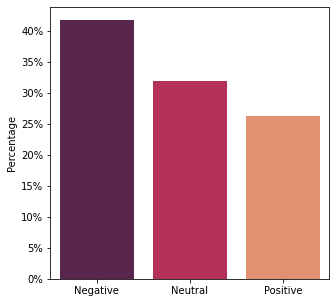

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))

counts = first_wave.Label.value_counts(normalize=True)

sns.barplot(x=counts.index, y=counts, ax=ax, palette="rocket")

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.show()

## Decrease

In [93]:
decrease['Scores']=decrease['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
decrease['Compound']= decrease['Scores'].apply(lambda d:d['compound'])
decrease['Label'] = decrease['Compound'].apply(lambda c: 'POS' if c > 0 else ('NEG' if c < 0 else 'NEU'))

In [94]:
decrease

,Comment,Author,Timestamp,LinkedPostID_final,Scores,Compound,Label
727,Congratulations /u/DeepFuckingValue 🚀\n\nIt's ...,only1parkjisung,2021-01-27,l6ekdz,"{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'comp...",0.8360,POS
729,HE’S STILL IN !!! 👀 💎🙌 🚀🚀🚀,quackquack105,2021-01-27,l6ekdz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
730,# FIFTY. MILLION. DOLLARS.\n\n1000x return! **...,TurkeyPits,2021-01-27,l6ekdz,"{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",0.3987,POS
731,Your steady hand convinced many of us to not o...,reality_czech,2021-01-27,l6ekdz,"{'neg': 0.054, 'neu': 0.758, 'pos': 0.188, 'co...",0.6310,POS
732,Cant wait to watch the ESPN 30 for 30 they mak...,rifer53,2021-01-27,l6ekdz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
...,...,...,...,...,...,...,...
115824,the market is down -468 points\n\nGME is up 11...,cj1angle,2021-01-27,l65p3u,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
115825,#In until this shit hits 8008.135,LongEZE,2021-01-27,l65p3u,"{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'comp...",-0.6428,NEG
115826,MY ROBINHOOD WOULDNT LET ME BUY FOR A COUPLE M...,Hargreaves7,2021-01-27,l65p3u,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
115827,#all brokerages being down is bullish 🚀🚀,XXXHELLBOY,2021-01-27,l65p3u,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU


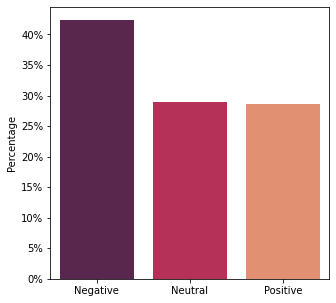

In [95]:
fig, ax = plt.subplots(figsize=(5, 5))

counts = decrease.Label.value_counts(normalize=True)

sns.barplot(x=counts.index, y=counts, ax=ax, palette="rocket")

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.show()

## Second wave

In [96]:
second_wave['Scores']=second_wave['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
second_wave['Compound']= second_wave['Scores'].apply(lambda d:d['compound'])
second_wave['Label'] = second_wave['Compound'].apply(lambda c: 'POS' if c > 0 else ('NEG' if c < 0 else 'NEU'))

In [97]:
second_wave

,Comment,Author,Timestamp,LinkedPostID_final,Scores,Compound,Label
67,This just makes me more eager to fuck them ove...,LemonPoopyDumpling,2021-01-28,l6wu59,"{'neg': 0.16, 'neu': 0.722, 'pos': 0.119, 'com...",-0.2431,NEG
68,I smell a class action,jab116,2021-01-28,l6wu59,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
69,I haven't even been able to use the search fun...,DerpingtonHerpsworth,2021-01-28,l6wu59,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp...",-0.4019,NEG
70,Hop on Fidelity!,Milkpowder44,2021-01-28,l6wu59,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
71,Exactly!!! Their best option would be to just ...,Cherry_and_the_white,2021-01-28,l6wu59,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.7249,POS
...,...,...,...,...,...,...,...
111847,Some days when all I see is red dildos 📈 I jus...,3JaneTessier-Ashpool,2021-01-28,l77h3i,"{'neg': 0.017, 'neu': 0.844, 'pos': 0.139, 'co...",0.8790,POS
111848,I have done nothing but lose fucking money sin...,sicklyfofifty,2021-01-28,l77h3i,"{'neg': 0.32, 'neu': 0.591, 'pos': 0.09, 'comp...",-0.8554,NEG
115389,"If i win, im buying George Soros a big mac",Nilmag,2021-01-28,l685hg,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.5859,POS
115390,That’s the difference. When people like us (th...,dontbdkch29,2021-01-28,l685hg,"{'neg': 0.05, 'neu': 0.792, 'pos': 0.158, 'com...",0.5719,POS


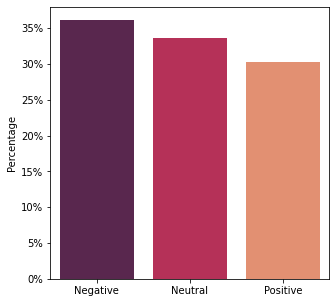

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))

counts = second_wave.Label.value_counts(normalize=True)

sns.barplot(x=counts.index, y=counts, ax=ax, palette="rocket")

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.show()

## Post event

In [99]:
post_event['Scores']=post_event['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
post_event['Compound']= post_event['Scores'].apply(lambda d:d['compound'])
post_event['Label'] = post_event['Compound'].apply(lambda c: 'POS' if c > 0 else ('NEG' if c < 0 else 'NEU'))

In [100]:
post_event

,Comment,Author,Timestamp,LinkedPostID_final,Scores,Compound,Label
0,Bro wtf... 2021 is crazy.,Crimson_Kang,2021-01-30,l8rf4k,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400,NEG
1,This is the hype we need for next week!\n\nWE ...,Brankela3,2021-01-30,l8rf4k,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.5882,POS
2,This is easily one of the greatest things to h...,shorgarr,2021-01-30,l8rf4k,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.7650,POS
3,Just when you think this sub can't be any dumb...,MuchArtichoke3,2021-01-30,l8rf4k,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.2755,POS
6,This is what happens when you put money into t...,dontescapereality,2021-01-30,l8rf4k,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.4767,POS
...,...,...,...,...,...,...,...
117867,Haha rekt,blumpkinblake,2021-02-20,lohbb7,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compou...",0.4588,POS
117868,*The family accountant*,Slyx37,2021-02-20,lohbb7,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
117869,Now I don’t feel so bad..,Saint_of_Fury,2021-02-20,lohbb7,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU
117870,Dude is ballin' on cloud air Force onesies,hellpyer,2021-02-20,lohbb7,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEU


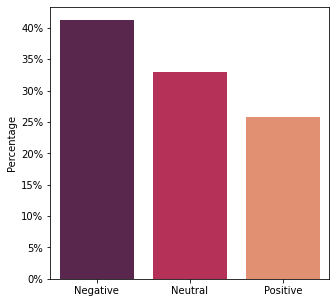

In [101]:
fig, ax = plt.subplots(figsize=(5, 5))

counts = post_event.Label.value_counts(normalize=True)

sns.barplot(x=counts.index, y=counts, ax=ax, palette="rocket")

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.show()